In [1]:
## Creating our save_fig function and import some important dependencies.

from __future__ import print_function, division, unicode_literals

import numpy as np
import os

np.random.seed(42)

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=14)
mpl.rc('ytick',labelsize=14)

PROJECT_ROOT_DIR = r"C:\Users\kngu0033\Desktop\MachineLearning\HandsOnMachineLearningProj"
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR,"images",CHAPTER_ID)

def save_fig(fig_id, tight_layout = True, fig_extension="png", resolution = 300):
    path = os.path.join(IMAGES_PATH,fig_id + "." + fig_extension)
    print("Saving figure ",fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format= fig_extension,dpi=resolution)
    
import warnings
warnings.filterwarnings(action = "ignore",message="^internal gelsd")

# MNIST


In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target,i) for i,target in enumerate(mnist.target[:60000])]))[:,1]
    reorder_test = np.array(sorted([(target,i) for i,target in enumerate(mnist.target[60000:])]))[:,1]
    mnist.data[:60000]   = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:]   = mnist.data[60000+reorder_test]    
    mnist.target[60000:] = mnist.target[60000+reorder_test] 

In [3]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784',version = 1 ,cache =True)
    mnist.target = mnist.target.astype(np.int8)
    sort_by_target(mnist)
except ImportError:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('MNIST original')
mnist["data"],mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [4]:
mnist.data.shape

(70000, 784)

In [5]:
X = mnist["data"]
y = mnist["target"]

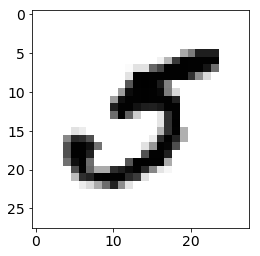

In [6]:
import matplotlib 
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap  = matplotlib.cm.binary,
          interpolation = "nearest")
plt.show()

In [7]:
y[36000]

5

In [8]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]


In [9]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

In [10]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure  more_digits_plot


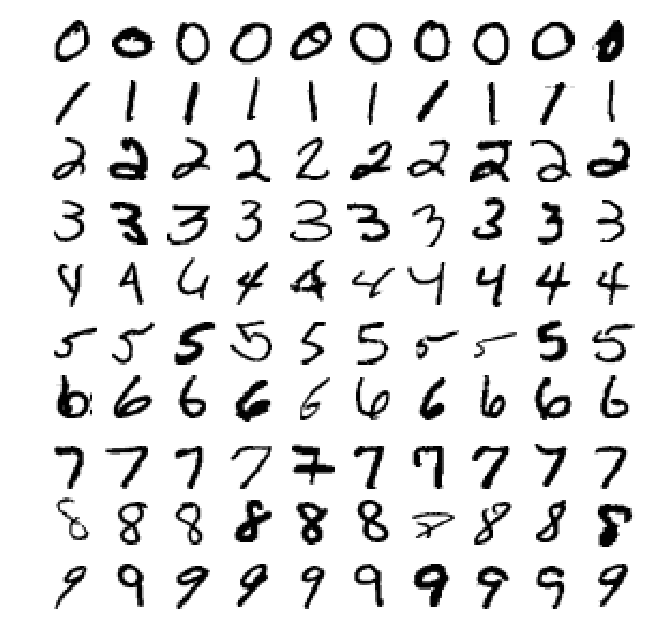

In [11]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600],X[30600:60000:590]]
plot_digits(example_images,images_per_row = 10)
save_fig("more_digits_plot")
plt.show()

# Binary Classifier

In [12]:
y_train_5 = (y_train == 5)
y_test_5  = (y_test  == 5)

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter = 5, tol = -np.infty , random_state = 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
sgd_clf.predict([some_digit])

array([ True])

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5 , cv = 3, scoring = "accuracy")

array([0.9502 , 0.96565, 0.96495])

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42 )

for train_index, test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold   = X_train[test_index]
    y_test_fold   = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.9502
0.96565
0.96495


In [17]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X , y = None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype = bool)

In [18]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train , cv =3 , scoring = "accuracy")

array([0.10035, 0.097  , 0.0988 ])

In [19]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]], dtype=int64)

In [21]:
y_train_perfect_predictions = y_train_5

In [22]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [23]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.7687135020350381

In [24]:
recall_score(y_train_5, y_train_pred)

0.801328168234643

In [25]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7846820809248555

In [26]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([161855.74572176])

In [27]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [28]:
y_some_digit_pred

array([ True])

In [29]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [30]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [31]:
y_scores.shape

(60000,)

In [32]:
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [33]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure  precision_recall_vs_threshold_plot


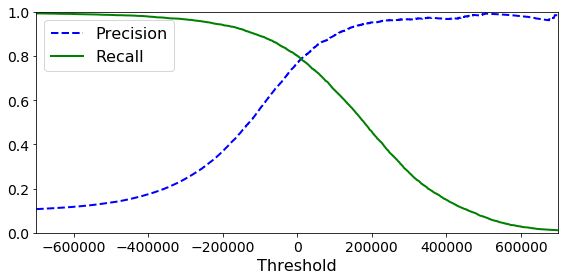

In [34]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [35]:
(y_train_pred == (y_scores > 0)).all()

True

In [36]:
y_train_pred_90 = (y_scores > 70000)

In [37]:
precision_score(y_train_5, y_train_pred_90)

0.8659205116491548

In [38]:
recall_score(y_train_5, y_train_pred_90)

0.6993174691016417

Saving figure  precision_vs_recall_plot


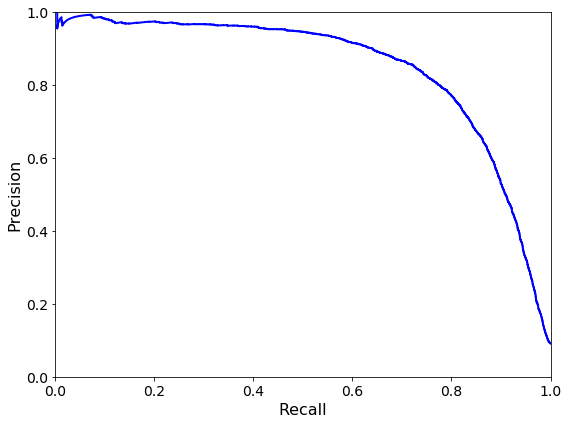

In [39]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

# ROC curves

In [40]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure  roc_curve_plot


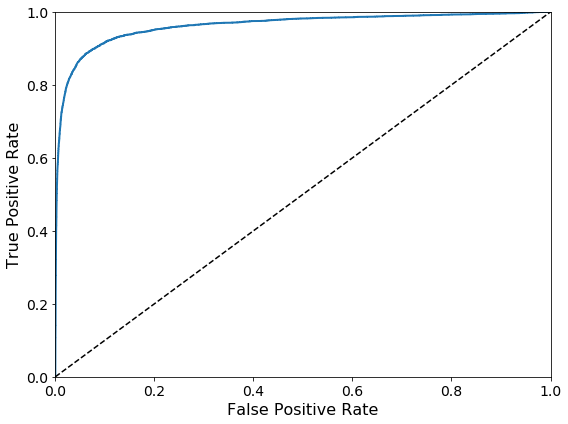

In [41]:
def plot_roc_curve(fpr,tpr,label = None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate', fontsize = 16)
    plt.ylabel('True Positive Rate', fontsize = 16)
    
plt.figure(figsize =(8,6))
plot_roc_curve(fpr,tpr)
save_fig("roc_curve_plot")
plt.show()

In [42]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9624496555967156

In [43]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [44]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Saving figure  roc_curve_comparison_plot


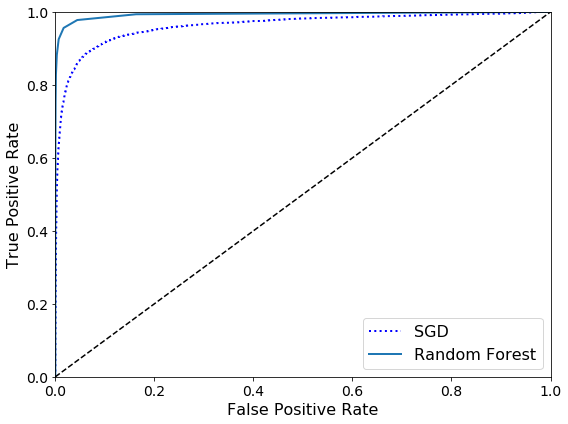

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [46]:
roc_auc_score(y_train_5, y_scores_forest)

0.9931243366003829

In [47]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9852973447443494

In [48]:
recall_score(y_train_5, y_train_pred_forest)

0.8282604685482383

# multiclass Classification

In [49]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5], dtype=int8)

In [50]:
"""
We can see that classifier create 10 classifiers in the out 94
"""

'\nWe can see that classifier create 10 classifiers in the out 94\n'

In [51]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores 

array([[-311402.62954431, -363517.28355739, -446449.5306454 ,
        -183226.61023518, -414337.15339485,  161855.74572176,
        -452576.39616343, -471957.14962573, -518542.33997148,
        -536774.63961222]])

In [52]:
np.argmax(some_digit_scores)

5

In [53]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [54]:
sgd_clf.classes_[5]

5

In [55]:
#Now we try to create a onevsoneclassifier
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter = 5, tol = -np.infty, random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array([5], dtype=int8)

In [56]:
len(ovo_clf.estimators_)

45

In [57]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([5], dtype=int8)

In [58]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [59]:
cross_val_score(sgd_clf,X_train,y_train,cv = 3 , scoring = "accuracy")

array([0.84063187, 0.84899245, 0.86652998])

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

array([0.91011798, 0.90874544, 0.906636  ])

# Error Analysis

In [61]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5725,    3,   24,    9,   10,   49,   50,   10,   39,    4],
       [   2, 6493,   43,   25,    7,   40,    5,   10,  109,    8],
       [  51,   41, 5321,  104,   89,   26,   87,   60,  166,   13],
       [  47,   46,  141, 5342,    1,  231,   40,   50,  141,   92],
       [  19,   29,   41,   10, 5366,    9,   56,   37,   86,  189],
       [  73,   45,   36,  193,   64, 4582,  111,   30,  193,   94],
       [  29,   34,   44,    2,   42,   85, 5627,   10,   45,    0],
       [  25,   24,   74,   32,   54,   12,    6, 5787,   15,  236],
       [  52,  161,   73,  156,   10,  163,   61,   25, 5027,  123],
       [  43,   35,   26,   92,  178,   28,    2,  223,   82, 5240]],
      dtype=int64)

In [62]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure  confusion_matrix_plot


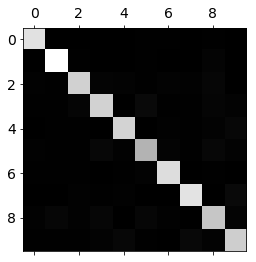

In [63]:
plt.matshow(conf_mx,cmap = plt.cm.gray)
save_fig("confusion_matrix_plot",tight_layout = False)
plt.show()

In [64]:
row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx/row_sums

Saving figure  confusion_matrix_errors_plot


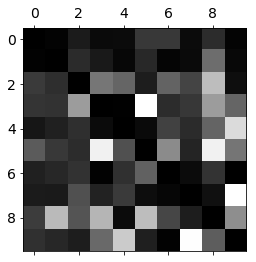

In [65]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot",tight_layout = False)
plt.show()

Saving figure  error_analysis_digits_plot


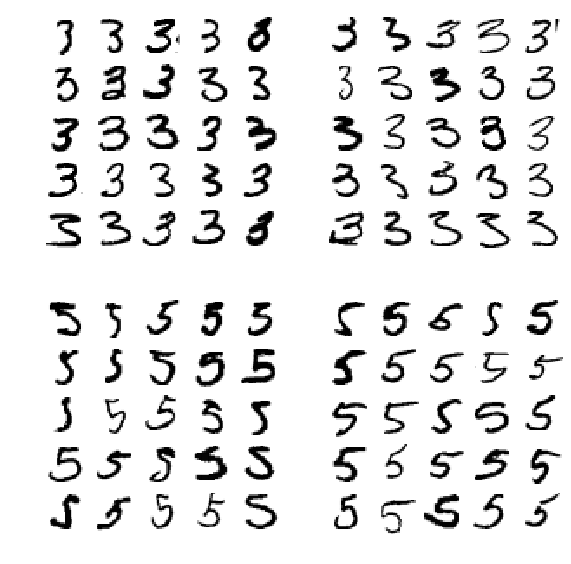

In [66]:
cl_a , cl_b = 3,5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

# Multilabel Classification

In [67]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = y_train>=7
y_train_odd   = y_train%2==1
y_multilabel  = np.c_[y_train_large,y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [68]:
knn_clf.predict([some_digit])

array([[False,  True]])

# Multioutput classification

In [69]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [86]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap = mpl.cm.binary,
              interpolation = "nearest")
    plt.axis("off")

Saving figure  noisy_digit_example_plot


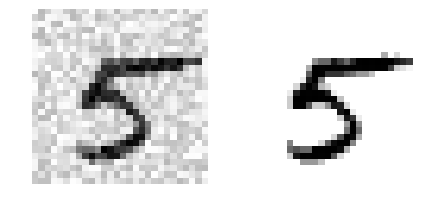

In [87]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

Saving figure  cleaned_digit_example_plot


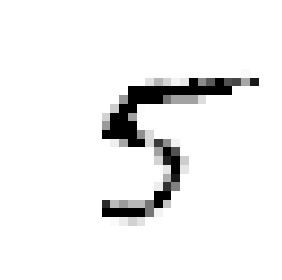

In [71]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digits(clean_digit)
save_fig("cleaned_digit_example_plot")

# Extra Material

In [72]:
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier()
y_probas_dmy = cross_val_predict(dmy_clf,X_train,y_train_5,cv=3,method = "predict_proba")
y_scores_dmy = y_probas_dmy[:,1]

In [73]:
y_scores_dmy

array([0, 0, 0, ..., 1, 1, 1])

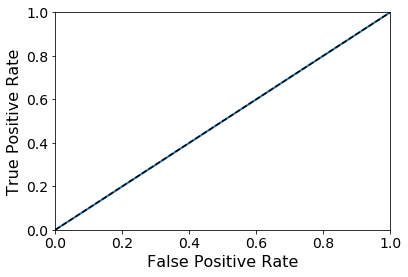

In [74]:
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fprr, tprr)

# KNN classifier 

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs =-1 , weights = 'distance',n_neighbors=4)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [76]:
y_knn_pred = knn_clf.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_knn_pred)

0.9714

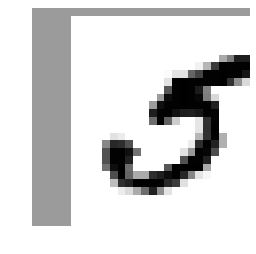

In [88]:
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [89]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

# Excercise solution

## Ex1: AN MINST classifier with over 97% accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights' : ["uniform","distance"], 'n_neighbors':[3,4,5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf,param_grid,cv=5,verbose = 3,n_jobs = -1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


SyntaxError: invalid syntax (<ipython-input-81-85cb24f1765d>, line 1)

# Data Augmentation

In [96]:
"""
Write a function that can shift an MNIST image in any direction (left,
right, up, or down) by one pixel.5 Then, for each image in the training
set, create four shifted copies (one per direction) and add them to the
training set. Finally, train your best model on this expanded training set
and measure its accuracy on the test set. You should observe that your
model performs even better now! This technique of artificially growing
the training set is called data augmentation or training set expansion
"""
from scipy.ndimage.interpolation import shift

#define the shifting function

def shift_image(data,dx,dy):
    image         = data.reshape(28,28)
    shifted_image = shift(image,[dy , dx])
    return shifted_image.reshape([-1])

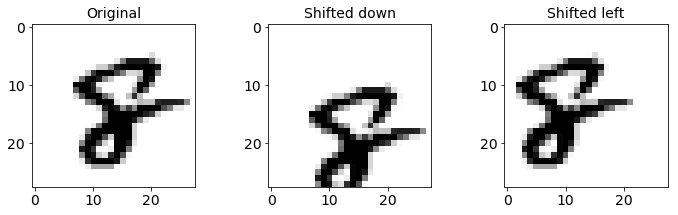

In [102]:
image = X_train[1000]
shifted_image_down = shift_image(image,0,5)
shifted_image_left = shift_image(image,-5,0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=  14)
plt.imshow(image.reshape(28,28) , interpolation = "nearest", cmap="Greys")

plt.subplot(132)
plt.title("Shifted down",fontsize=  14)
plt.imshow(shifted_image_down.reshape(28,28) , interpolation = "nearest", cmap="Greys")

plt.subplot(133)
plt.title("Shifted left", fontsize=  14)
plt.imshow(shifted_image_left.reshape(28,28) , interpolation = "nearest", cmap="Greys")

In [121]:
# Now creating for each picture in X_train 
# creating 4 pictures for each direction

X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx,dy in ((1,0),(-1,0),(0,1),(0,-1)):
    for image,label in zip(X_train,y_train):
        X_train_augmented.append(shift_image(image,dx,dy)) 
        y_train_augmented.append(label)


In [116]:
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [117]:
y_train_augmented.shape

(300000,)

In [114]:
shuffle_idx = np.random.permutation(len(X_train_augmented))


In [118]:
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [122]:
knn_clf = KNeighborsClassifier(n_neighbors= 4, weights= 'distance')

In [123]:
knn_clf.fit(X_train_augmented,y_train_augmented)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='distance')

In [124]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9763

# Excercise 3:
# Tackle the Titanic Dataset to make some prediction

In [126]:
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data  = pd.read_csv("test.csv")


In [130]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [128]:
train_labels = train_data["Survived"]

In [164]:
train_data["Survived"].value_counts()
train_data["Pclass"].value_counts()
train_data["Sex"].value_counts()
train_data["Embarked"].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [138]:
from sklearn.base import BaseEstimator,TransformerMixin

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X,y = None):
        return self
    def transform(self,X):
        return X[self.attribute_names]
        

In [150]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ("selec_numeric",DataFrameSelector(["Age","SibSp","Parch","Fare"])),
    ("imputer", SimpleImputer(strategy = "median"))
])

In [151]:
num_pipeline.fit_transform(train_data)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [170]:
# Now we need to handle the string information from the dataset
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self,X, y = None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                       index = X.columns)
        return self
    def transform(self,X, y = None):
        return X.fillna(self.most_frequent_)

In [171]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [172]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [173]:
cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [174]:
#now let try to combine all the numerical and categorical pipelines
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list = [
    ("num_pipeline",num_pipeline),
    ("cat_pipeline",cat_pipeline)
])

In [175]:
X_train = preprocess_pipeline.fit_transform(train_data)

In [176]:
X_train

array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  1.,  0.]])

# After preprocessing our data into num and cat
# now we can you SVC to train our model with 
# the data we observed from above

In [195]:
y_train = train_data["Survived"]
from sklearn.svm import SVC

svm_clf = SVC(gamma = 'auto')
svm_clf.fit(X_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [196]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = svm_clf.predict(X_test)


In [199]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf,X_train,train_labels,cv = 10)

In [201]:
svm_scores.mean()

0.7365250822835092

In [203]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
forest_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [204]:
forest_scores =  cross_val_score(forest_clf,X_train,train_labels,cv = 10)

In [205]:
forest_scores.mean()

0.8149526160481217

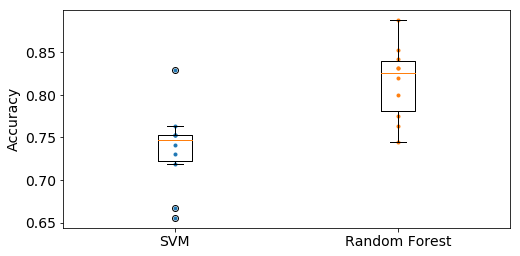

In [206]:
#visualize by boxplot
plt.figure(figsize=(8,4))
plt.plot([1]*10, svm_scores,".")
plt.plot([2]*10, forest_scores,".")
plt.boxplot([svm_scores,forest_scores], labels =("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize = 14)
plt.show()

In [214]:
train_data["AgeBucket"]=  train_data["Age"] //  15*15
train_data[["AgeBucket","Survived"]].groupby(['AgeBucket']).mean()



,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [217]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard","Survived"]].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


# Excersice 4: Spam Classifier

In [14]:
#Build a spam classifier (a more challenging exercise):
#Download examples of spam and ham from Apache
#SpamAssassin’s public datasets

import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL       = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL      = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH     = os.path.join("datasets","spam")
#Unzip the datasets and familiarize yourself with the data format
def fetch_spam_data(spam_url = SPAM_URL, spam_path =SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename,url in (("ham.tar.bz2",HAM_URL),("spam.tar.bz2",SPAM_URL)):
        path = os.path.join(spam_path,filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url,path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path = SPAM_PATH)
        tar_bz2_file.close()

In [15]:
fetch_spam_data()

In [16]:
HAM_DIR  = os.path.join(SPAM_PATH,"easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH,"spam")

ham_filenames  = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [17]:
len(spam_filenames)

500

In [18]:
len(ham_filenames)

2500

In [19]:
import email
import email.policy

def load_email(is_spam,filename,spam_path = SPAM_PATH):
    directory = "spam" if is_spam else "easy_ham"
    with open(os.path.join(spam_path, directory, filename), "rb") as f:
        return email.parser.BytesParser(policy = email.policy.default).parse(f)

In [20]:
ham_emails  = [load_email(is_spam = False, filename =  name) for name in ham_filenames]
spam_emails = [load_email(is_spam = True,  filename = name) for name in  spam_filenames]

In [32]:
#Let check the content of a hamful email and spam email
print(ham_emails[1].get_content().strip()) # can als

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [36]:
print(spam_emails[4].get_content().strip())

I thought you might like these:
1) Slim Down - Guaranteed to lose 10-12 lbs in 30 days
http://www.freeyankee.com/cgi/fy2/to.cgi?l=822slim1

2) Fight The Risk of Cancer! 
http://www.freeyankee.com/cgi/fy2/to.cgi?l=822nic1 

3) Get the Child Support You Deserve - Free Legal Advice 
http://www.freeyankee.com/cgi/fy2/to.cgi?l=822ppl1

Offer Manager
Daily-Deals








If you wish to leave this list please use the link below.
http://www.qves.com/trim/?social@linux.ie%7C29%7C134077


-- 
Irish Linux Users' Group Social Events: social@linux.ie
http://www.linux.ie/mailman/listinfo/social for (un)subscription information.
List maintainer: listmaster@linux.ie


In [61]:
#Get email structure
def get_email_structure(email):
    if isinstance(email,str):
        return email
    payload = email.get_payload()
    if isinstance(payload , list):
        return "multipart({})".format(",".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else: 
        return email.get_content_type()

In [59]:
from collections import Counter

def structure_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

In [62]:
structure_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain,application/pgp-signature)', 66),
 ('multipart(text/plain,text/html)', 8),
 ('multipart(text/plain,text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain,application/octet-stream)', 2),
 ('multipart(text/plain,text/enriched)', 1),
 ('multipart(text/plain,application/ms-tnef,text/plain)', 1),
 ('multipart(multipart(text/plain,text/plain,text/plain),application/pgp-signature)',
  1),
 ('multipart(text/plain,video/mng)', 1),
 ('multipart(text/plain,multipart(text/plain))', 1),
 ('multipart(text/plain,application/x-pkcs7-signature)', 1),
 ('multipart(text/plain,multipart(text/plain,text/plain),text/rfc822-headers)',
  1),
 ('multipart(text/plain,multipart(text/plain,text/plain),multipart(multipart(text/plain,application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain,application/x-java-applet)', 1)]

In [63]:
structure_counter(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain,text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain,image/jpeg)', 3),
 ('multipart(text/html,application/octet-stream)', 2),
 ('multipart(text/plain,application/octet-stream)', 1),
 ('multipart(text/html,text/plain)', 1),
 ('multipart(multipart(text/html),application/octet-stream,image/jpeg)', 1),
 ('multipart(multipart(text/plain,text/html),image/gif)', 1),
 ('multipart/alternative', 1)]

In [64]:
for header,value in spam_emails[0].items():
    print(header,":",value)

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

In [69]:
for email in spam_emails: 
    print(email["Subject"])

Life Insurance - Why Pay More?
[ILUG] Guaranteed to lose 10-12 lbs in 30 days 10.206
Guaranteed to lose 10-12 lbs in 30 days                          11.150
Re: Fw: User Name & Password to Membership To 5 Sites zzzz@spamassassin.taint.org pviqg
[ILUG-Social] re: Guaranteed to lose 10-12 lbs in 30 days 10.148
RE: Your Bank Account Information 
FORTUNE 500 COMPANY HIRING, AT HOME REPS.
Is Your Family Protected?
RE: Important Information Concerning Your Bank Account 
MULTIPLY YOUR CUSTOMER BASE!
^^^^^Cell Phone Belt Clips $1.95^^^^^^                           18070
wives and girlfriends cheating and whoring around 
Get the Child Support You Deserve                            11.180
FREE Cell Phone + $50 Cash Back!
Conference calls/best quality/$.18 per minute!
Plans for cable
HELP WANTED.  WORK FROM HOME REPS.
A CRY FOR HELP
ADV: Lowest life insurance rates available!                                                   moode
[ILUG] Get the Child Support You Deserve                     10.13

In [70]:
## Trying to split data into training and test set

import numpy as np
from sklearn.model_selection import train_test_split

In [82]:
X = np.array(ham_emails + spam_emails)

In [87]:
y = np.array([0]*len(ham_emails) + [1]*len(spam_emails))

In [92]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [93]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
# now we got the data for train and test, let convert 
# them into plain text. remove <a></a> <head></head>
# other tag inside the html and leave only the plain text
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

In [99]:
html_spam_emails  = [email for email in X_train[y_train == 1]
                    if get_email_structure(email) == "text/html"]

sample_html_spam  = html_spam_emails[7]
print(sample_html_spam.get_content().strip())

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

In [102]:
#Now just simply remove all of the tags
sample_html_spam_no_tag = html_to_plain_text(sample_html_spam.get_content())
print(sample_html_spam_no_tag)


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

In [107]:
def email_to_text(email):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ("text/plain", "text/html"):
            continue
        try:
            content = part.get_content()
        except: # in case of encoding issues
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)

In [108]:
print(email_to_text(sample_html_spam)[:100], "...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Wat ...


In [111]:
import nltk
stemmer = nltk.PorterStemmer()
for word in ("Computations", "Computation", "Computing", "Computed", "Compute", "Compulsive"):
    print(word, "=>", stemmer.stem(word))

Computations => comput
Computation => comput
Computing => comput
Computed => comput
Compute => comput
Compulsive => compuls


In [116]:
try:
    import urlextract # may require an Internet connection to download root domain names
    
    url_extractor = urlextract.URLExtract()
    print(url_extractor.find_urls("Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"))
except ImportError:
    print("Error: replacing URLs requires the urlextract module.")
    url_extractor = None

Error: replacing URLs requires the urlextract module.
